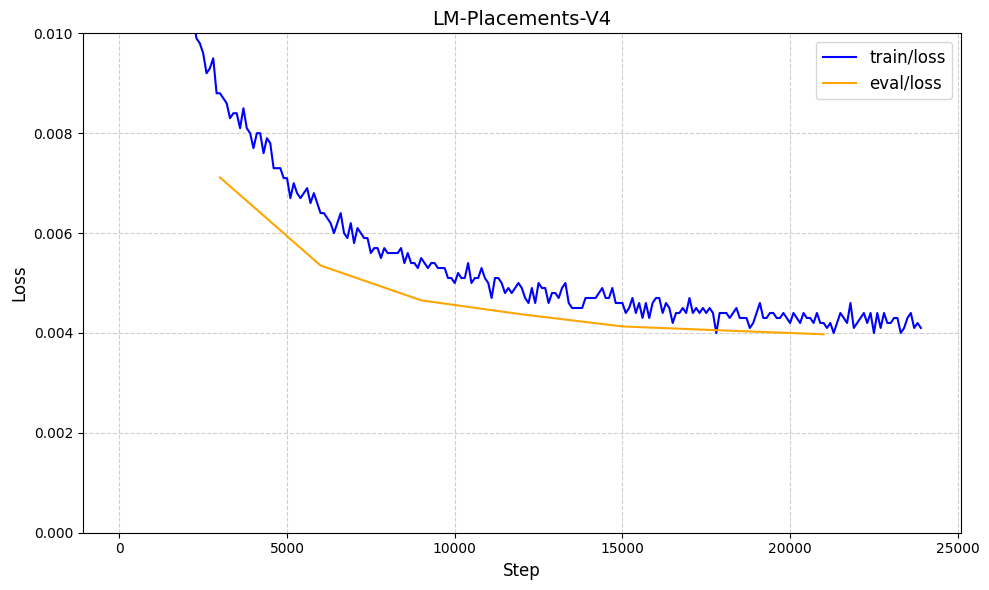

In [3]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

# Pfad zur Event-Datei
event_path = "events.out.tfevents.1740311767.1de3aaa3b895.1685.0"

# Event-Datei laden
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# Nur gewünschte Tags
selected_tags = ["train/loss", "eval/loss"]

# Farben für konsistente Darstellung
color_map = {
    "train/loss": "blue",
    "eval/loss": "orange"
}

plt.figure(figsize=(10, 6))

# Beide Linien im selben Plot
for tag in selected_tags:
    if tag not in event_acc.Tags()["scalars"]:
        print(f"Tag '{tag}' not found in log.")
        continue

    events = event_acc.Scalars(tag)
    steps = [e.step for e in events]
    values = [e.value for e in events]

    plt.plot(steps, values, label=tag, color=color_map.get(tag, None))

# Achsen und Layout
plt.title("LM-Placements-V4", fontsize=14)
plt.xlabel("Step", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.ylim(0, 0.01)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()